In [130]:
# Cognifyz Data Analysis Internship
## Level 1: Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv("/content/Dataset/Dataset .csv")

# Show First 5 rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [132]:
df.shape

(9551, 21)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [134]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [135]:
df[['City', 'Cuisines', 'Price range', 'Aggregate rating', 'Has Online delivery']].isnull().sum()


,0
City,0
Cuisines,9
Price range,0
Aggregate rating,0
Has Online delivery,0


In [136]:
print("\nChecking negative values")
df['Aggregate rating'].describe()



Checking negative values


,Aggregate rating
count,9551.000000
mean,2.666370
std,1.516378
min,0.000000
25%,2.500000
50%,3.200000
75%,3.700000
max,4.900000


In [137]:
print("\nChecking categorical consistency")
df['Has Online delivery'].value_counts()


Checking categorical consistency


,count
Has Online delivery,
No,7100
Yes,2451


In [138]:
print("\nChecking duplicates")
df.duplicated().sum()



Checking duplicates


np.int64(0)

In [139]:
# ---------- TASK 1 : Top Cuisines  ---------

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [140]:
# Drop rows where cusines are missing
df_cuisine = df.dropna(subset=['Cuisines'])

# Split cusines into list
all_cuisines = df_cuisine['Cuisines'].str.split(', ')

print(all_cuisines)


0             [French, Japanese, Desserts]
1                               [Japanese]
2       [Seafood, Asian, Filipino, Indian]
3                        [Japanese, Sushi]
4                       [Japanese, Korean]
                       ...                
9546                             [Turkish]
9547     [World Cuisine, Patisserie, Cafe]
9548              [Italian, World Cuisine]
9549                     [Restaurant Cafe]
9550                                [Cafe]
Name: Cuisines, Length: 9542, dtype: object


In [141]:
# Convert list of lists into single list
cuisine_list = [cuisine for sublist in all_cuisines for cuisine in sublist]

print("\nCuisines List:")
print(cuisine_list)

# Convert to Series
cuisine_series = pd.Series(cuisine_list)

print("\nCuisines List in Series:")
print(cuisine_series)


Cuisines List:
['French', 'Japanese', 'Desserts', 'Japanese', 'Seafood', 'Asian', 'Filipino', 'Indian', 'Japanese', 'Sushi', 'Japanese', 'Korean', 'Chinese', 'Asian', 'European', 'Seafood', 'Filipino', 'Asian', 'European', 'European', 'Asian', 'Indian', 'Filipino', 'Filipino', 'Mexican', 'American', 'Ice Cream', 'Desserts', 'Filipino', 'Mexican', 'Filipino', 'Korean', 'Cafe', 'American', 'Italian', 'Filipino', 'Italian', 'Pizza', 'Filipino', 'Cafe', 'Korean', 'Desserts', 'Cafe', 'Bakery', 'American', 'Italian', 'Seafood', 'American', 'Mediterranean', 'Japanese', 'American', 'Asian', 'Italian', 'Seafood', 'Fast Food', 'French', 'Cafe', 'Bakery', 'Brazilian', 'Pizza', 'Japanese', 'Arabian', 'Japanese', 'Brazilian', 'Cafe', 'Italian', 'Pizza', 'Bar Food', 'Brazilian', 'Mexican', 'Grill', 'International', 'Peruvian', 'Latin American', 'American', 'Grill', 'Seafood', 'International', 'Italian', 'American', 'Burger', 'Seafood', 'Bar Food', 'Brazilian', 'Desserts', 'Cafe', 'Juices', 'Healthy

In [142]:
top_3_cuisines =  cuisine_series.value_counts().head(3)

print("\nTop three most common cuisines in the dataset:-")
print(top_3_cuisines)


Top three most common cuisines in the dataset:-
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [143]:
total_restaurants = df_cuisine.shape[0]

percentage = (top_3_cuisines / total_restaurants) * 100

print("\nThe percentage of restaurants that serve each of the top cuisines:-")
print(percentage)


The percentage of restaurants that serve each of the top cuisines:-
North Indian    41.500734
Chinese         28.662754
Fast Food       20.813247
Name: count, dtype: float64


In [144]:
result = pd.DataFrame({
    'Cuisine': top_3_cuisines.index,
    'Restaurant_Count': top_3_cuisines.values,
    'Percentage (%)': percentage.values
})

print(result)

        Cuisine  Restaurant_Count  Percentage (%)
0  North Indian              3960       41.500734
1       Chinese              2735       28.662754
2     Fast Food              1986       20.813247


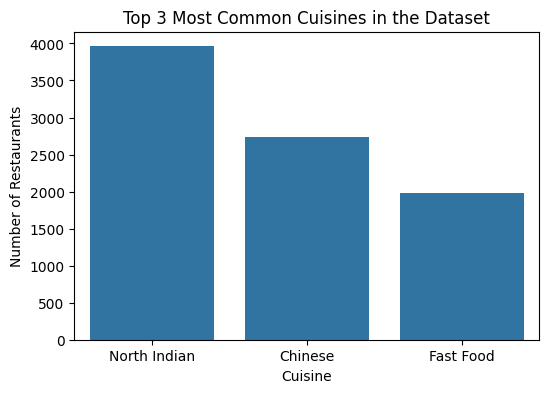

In [145]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top_3_cuisines.index, y=top_3_cuisines.values)
plt.title('Top 3 Most Common Cuisines in the Dataset')
plt.ylabel('Number of Restaurants')
plt.xlabel('Cuisine')
plt.show()


In [146]:
print("\n I analyzed the cuisines by spltting List and serires, identidief most frequent cuisine and percentage of each Cuisines across all resturants")
# Key Insights:-
# Many restaurants offer multiple cuisines,
# suggesting a strategy to attract a wider customer base.
# But only three cuisines make there place at the top.


 I analyzed the cuisines by spltting List and serires, identidief most frequent cuisine and percentage of each Cuisines across all resturants


In [147]:
# ---------- TASK 2 : City Analysis ---------

# Checking Required Columns
df[['City','Aggregate rating']].head(10)


,City,Aggregate rating
0,Makati City,4.8
1,Makati City,4.5
2,Mandaluyong City,4.4
3,Mandaluyong City,4.9
4,Mandaluyong City,4.8
5,Mandaluyong City,4.4
6,Pasay City,4.0
7,Pasay City,4.2
8,Pasay City,4.9
9,Pasig City,4.8


In [148]:
city_counts = df['City'].value_counts()
city_counts

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Lakes Entrance,1
Mohali,1
Panchkula,1


In [149]:
city_highestRest = df['City'].value_counts()

print("\nCount restaurants per city:-")
# city_highestRest
print(city_highestRest)


Count restaurants per city:-
City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Mohali               1
Panchkula            1
Bandung              1
Randburg             1
Name: count, Length: 141, dtype: int64


In [150]:
top_city = city_counts.idxmax()
top_city_count = city_counts.max()

print("\nTop City with the highest number of restaurants:-")
print([top_city], [top_city_count])



Top City with the highest number of restaurants:-
['New Delhi'] [5473]


In [151]:
avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

print("\nAverage rating of restaurants in each city:-")
print(avg_rating)


Average rating of restaurants in each city:-
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


In [152]:
highest_avg_city = avg_rating.idxmax()
highest_avg_rating = avg_rating.max

print("\nCity with the highest average rating:-")
print([highest_avg_city], [highest_avg_rating])



City with the highest average rating:-
['Inner City'] [<bound method Series.max of City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64>]


In [153]:
summary = pd.DataFrame({
    'City': avg_rating.index,
    'Average Rating': avg_rating.values,
})

summary.head(10)

,City,Average Rating
0,Inner City,4.900000
1,Quezon City,4.800000
2,Makati City,4.650000
3,Pasig City,4.633333
4,Mandaluyong City,4.625000
5,Beechworth,4.600000
6,London,4.535000
7,Taguig City,4.525000
8,Secunderabad,4.500000
9,Lincoln,4.500000


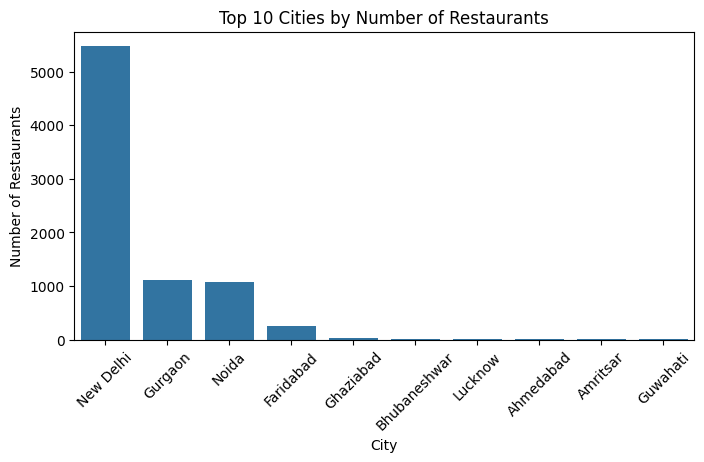

In [154]:
top_10_cities = city_counts.head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_10_cities.index, y=top_10_cities.values)
plt.title("Top 10 Cities by Number of Restaurants")
plt.xticks(rotation=45)
plt.ylabel("Number of Restaurants")
plt.xlabel("City")
plt.show()


In [155]:
print("In Task 2, I analyzed city-wise restaurant distribution. I identified the city with the highest number of restaurants, calculated average ratings for each city, and found the city with the highest average rating using group-by analysis.")
# Key Insights
# Cities with a higher number of restaurants tend to have more competitive markets.
# Restaurants are highly concentrated in a few major cities, highlighting urban dominance in the food service industry

In Task 2, I analyzed city-wise restaurant distribution. I identified the city with the highest number of restaurants, calculated average ratings for each city, and found the city with the highest average rating using group-by analysis.


In [156]:
# ---------- TASK 3 : Price Range Distribution ---------
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [157]:
df['Price range'].head(10)

,Price range
0,3
1,3
2,4
3,4
4,4
5,3
6,4
7,4
8,4
9,3


In [158]:
price_counts = df['Price range'].value_counts()

print("\nCount of restaurants in each price range:-")
print(price_counts)




Count of restaurants in each price range:-
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


In [159]:
price_counts = price_counts.sort_index()

print("\nCount of restaurants in each price range:-")
print(price_counts)


Count of restaurants in each price range:-
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


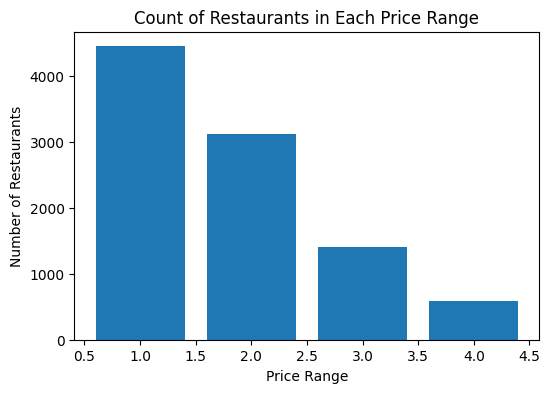

In [160]:
plt.figure(figsize=(6,4))
plt.bar(price_counts.index,price_counts.values)
plt.title("Count of Restaurants in Each Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

# Bar chart created to visualize the distribution of price ranges among the restaurants.


In [161]:
total_restaurants = len(df)

print("\nTotal number of restaurants:-")
print(total_restaurants)


Total number of restaurants:-
9551


In [162]:
percentage_price = price_counts / total_restaurants * 100

print("\nPercentage of restaurants in each price range:-")
print(percentage_price)


Percentage of restaurants in each price range:-
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [163]:
price_summary = pd.DataFrame({
    'Price Range': price_counts.index,
    'Restaurant Count': price_counts.values,
    'Percentage (%)': percentage_price.values
})

price_summary
# the percentage of restaurants in each price range category

,Price Range,Restaurant Count,Percentage (%)
0,1,4444,46.529159
1,2,3113,32.593446
2,3,1408,14.741912
3,4,586,6.135483


In [164]:
print("\nI completed this task by analyzing the price range columns by performing price counts and used bar chart to visualized it.")
print("\n Although, successfully calculated the percentage of each price range")

# Key Insights
# Most restaurants fall within the lower to mid price ranges, suggesting affordability is a key market driver.
# Higher price range restaurants are fewer in number, indicating a smaller premium dining segment.


I completed this task by analyzing the price range columns by performing price counts and used bar chart to visualized it.

 Although, successfully calculated the percentage of each price range


In [165]:
# ---------- TASK 4 : Online Delivery ---------
df['Has Online delivery'].head(10)

,Has Online delivery
0,No
1,No
2,No
3,No
4,No
5,No
6,No
7,No
8,No
9,No


In [166]:
online_dlivery = df.dropna(subset=['Has Online delivery'])

print(online_dlivery)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [167]:
delivery_counts = df['Has Online delivery'].value_counts()

print("\nCount of restaurants that offer online delivery:-")
print(delivery_counts)


Count of restaurants that offer online delivery:-
Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64


In [168]:
total_restaurants = len(df)

print("\nTotal number of restaurants:-")
print(total_restaurants)

devlivery_percentage = (delivery_counts / total_restaurants) * 100
print("\nPercentage of restaurants that offer online delivery:-")
devlivery_percentage


Total number of restaurants:-
9551

Percentage of restaurants that offer online delivery:-


,count
Has Online delivery,
No,74.337766
Yes,25.662234


In [169]:
avg_rating_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()

print("\nAverage rating of restaurants that offer online delivery:-")
print(avg_rating_delivery)


Average rating of restaurants that offer online delivery:-
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


In [170]:
delivery_summary = pd.DataFrame({
    'Online Delivery': avg_rating_delivery.index,
    'Average Rating': avg_rating_delivery.values
})

delivery_summary


,Online Delivery,Average Rating
0,No,2.465296
1,Yes,3.248837


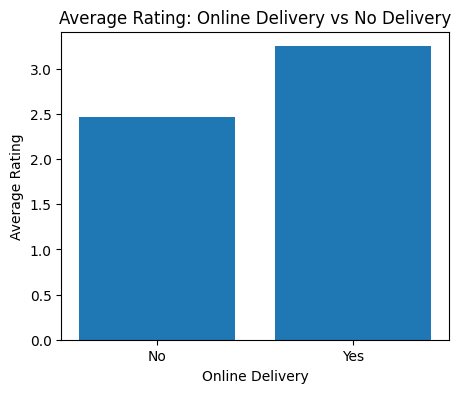

In [171]:
plt.figure(figsize=(5,4))
plt.bar(avg_rating_delivery.index, avg_rating_delivery.values)
plt.xlabel("Online Delivery")
plt.ylabel("Average Rating")
plt.title("Average Rating: Online Delivery vs No Delivery")
plt.show()


In [172]:
print("\nI analyzed the availability of online delivery among restaurants and calculated its percentage")
print("\nAlthough, compared average ratings to understand whether online delivery has an impact on customer ratings.")
# Key Insights
# significant proportion of restaurants offer online delivery, showing strong adoption of digital food services.
# Online delivery has become an important service feature in the restaurant industry.


I analyzed the availability of online delivery among restaurants and calculated its percentage

Although, compared average ratings to understand whether online delivery has an impact on customer ratings.
